In [1]:
# import packages
import re
import pandas as pd
import pyttsx3
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import csv
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
# set default matplotlib parameters
COLOR = '#ababab'
mpl.rcParams['figure.titlesize'] = 16
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['grid.color'] = COLOR
mpl.rcParams['grid.alpha'] = 0.1

In [3]:
# import data set and create a data frame
training = pd.read_csv('Data/Training.csv')
testing= pd.read_csv('Data/Testing.csv')
df_credit = pd.read_csv('Data/dataset.csv')

In [4]:
# show first 5 rows
df_credit.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# data frame shape
print('Number of rows: ', df_credit.shape[0])
print('Number of columns: ', df_credit.shape[1])

Number of rows:  4920
Number of columns:  18


In [6]:
df_credit.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')

In [7]:
# data frame summary
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4920 non-null   object
 1   Unnamed: 1   4920 non-null   object
 2   Unnamed: 2   4920 non-null   object
 3   Unnamed: 3   4920 non-null   object
 4   Unnamed: 4   4572 non-null   object
 5   Unnamed: 5   3714 non-null   object
 6   Unnamed: 6   2934 non-null   object
 7   Unnamed: 7   2268 non-null   object
 8   Unnamed: 8   1944 non-null   object
 9   Unnamed: 9   1692 non-null   object
 10  Unnamed: 10  1512 non-null   object
 11  Unnamed: 11  1194 non-null   object
 12  Unnamed: 12  744 non-null    object
 13  Unnamed: 13  504 non-null    object
 14  Unnamed: 14  306 non-null    object
 15  Unnamed: 15  240 non-null    object
 16  Unnamed: 16  192 non-null    object
 17  Unnamed: 17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [8]:
# percentage of missing values per feature
print((df_credit.isnull().sum() * 100 / df_credit.shape[0]).sort_values(ascending=False))

Unnamed: 17    98.536585
Unnamed: 16    96.097561
Unnamed: 15    95.121951
Unnamed: 14    93.780488
Unnamed: 13    89.756098
Unnamed: 12    84.878049
Unnamed: 11    75.731707
Unnamed: 10    69.268293
Unnamed: 9     65.609756
Unnamed: 8     60.487805
Unnamed: 7     53.902439
Unnamed: 6     40.365854
Unnamed: 5     24.512195
Unnamed: 4      7.073171
Unnamed: 1      0.000000
Unnamed: 3      0.000000
Unnamed: 2      0.000000
Unnamed: 0      0.000000
dtype: float64


In [9]:
# number of unique observations per column
df_credit.nunique().sort_values()

Unnamed: 17     1
Unnamed: 15     3
Unnamed: 16     3
Unnamed: 14     4
Unnamed: 13     8
Unnamed: 12    11
Unnamed: 11    18
Unnamed: 10    21
Unnamed: 8     21
Unnamed: 9     22
Unnamed: 7     26
Unnamed: 6     32
Unnamed: 1     34
Unnamed: 5     38
Unnamed: 0     41
Unnamed: 2     48
Unnamed: 4     50
Unnamed: 3     54
dtype: int64

In [10]:
training.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [11]:
# training data frame shape
print('Number of rows: ', training.shape[0])
print('Number of columns: ', training.shape[1])

Number of rows:  4920
Number of columns:  133


In [12]:
training.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [13]:
testing.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [14]:
# testing data frame shape
print('Number of rows: ', testing.shape[0])
print('Number of columns: ', testing.shape[1])

Number of rows:  41
Number of columns:  133


In [15]:
testing.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [16]:
# training data frame summary
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [17]:
# testing data frame summary
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 42.7+ KB


In [18]:
# percentage of missing values per feature of training dataset
print((training.isnull().sum() * 100 / training.shape[0]).sort_values(ascending=False))

itching                 0.0
spinning_movements      0.0
altered_sensorium       0.0
muscle_pain             0.0
irritability            0.0
                       ... 
abdominal_pain          0.0
constipation            0.0
back_pain               0.0
pain_behind_the_eyes    0.0
prognosis               0.0
Length: 133, dtype: float64


In [19]:
# percentage of missing values per feature of testing dataset
print((testing.isnull().sum() * 100 / testing.shape[0]).sort_values(ascending=False))

itching                 0.0
spinning_movements      0.0
altered_sensorium       0.0
muscle_pain             0.0
irritability            0.0
                       ... 
abdominal_pain          0.0
constipation            0.0
back_pain               0.0
pain_behind_the_eyes    0.0
prognosis               0.0
Length: 133, dtype: float64


In [20]:
# number of unique observations per column of training dataset
training.nunique().sort_values()

fluid_overload                   1
itching                          2
irritability                     2
depression                       2
toxic_look_(typhos)              2
                                ..
pain_behind_the_eyes             2
loss_of_appetite                 2
nausea                           2
blurred_and_distorted_vision     2
prognosis                       41
Length: 133, dtype: int64

In [21]:
# number of unique observations per column of testing dataset
training.nunique().sort_values()

fluid_overload                   1
itching                          2
irritability                     2
depression                       2
toxic_look_(typhos)              2
                                ..
pain_behind_the_eyes             2
loss_of_appetite                 2
nausea                           2
blurred_and_distorted_vision     2
prognosis                       41
Length: 133, dtype: int64

In [22]:
# show descriptive statistics
df_credit.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [23]:
# show descriptive statistics of training dataset
training.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# show descriptive statistics of testing dataset
testing.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.146341,0.170732,0.024390,0.048780,0.024390,0.170732,0.146341,0.048780,0.048780,0.024390,...,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390,0.024390
std,0.357839,0.380949,0.156174,0.218085,0.156174,0.380949,0.357839,0.218085,0.218085,0.156174,...,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174,0.156174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df_credit

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
training

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [27]:
testing

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [28]:
df_credit.isnull().sum()

Unnamed: 0        0
Unnamed: 1        0
Unnamed: 2        0
Unnamed: 3        0
Unnamed: 4      348
Unnamed: 5     1206
Unnamed: 6     1986
Unnamed: 7     2652
Unnamed: 8     2976
Unnamed: 9     3228
Unnamed: 10    3408
Unnamed: 11    3726
Unnamed: 12    4176
Unnamed: 13    4416
Unnamed: 14    4614
Unnamed: 15    4680
Unnamed: 16    4728
Unnamed: 17    4848
dtype: int64

In [29]:
training.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [30]:
testing.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [31]:
#feature matrix and target vector
cols= training.columns
cols= cols[:-1]
x = training[cols]
y = training['prognosis']
y1= y


reduced_data = training.groupby(training['prognosis']).max()

In [32]:
x.shape

(4920, 132)

In [33]:
y.shape

(4920,)

In [34]:
#mapping strings to numbers
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
testx    = testing[cols]
testy    = testing['prognosis']  
testy    = le.transform(testy)

In [36]:
#make the decesion tree classifier
clf1  = DecisionTreeClassifier()
clf = clf1.fit(x_train,y_train)
# print(clf.score(x_train,y_train))
# print ("cross result========")

scores = cross_val_score(clf, x_test, y_test, cv=3)
# print (scores)
print (scores.mean())
print(scores)

0.9759886138602606
[0.9704797  0.98151571 0.97597043]


In [37]:
# Make predictions on the test set
y_pred = clf1.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate recall
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Confusion Matrix:
[[37  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 0  0 42 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 44]]


In [38]:
cm

array([[37,  0,  0, ...,  0,  0,  0],
       [ 0, 42,  0, ...,  0,  0,  0],
       [ 0,  0, 42, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 41,  0,  0],
       [ 0,  0,  0, ...,  0, 40,  0],
       [ 0,  0,  0, ...,  0,  0, 44]], dtype=int64)

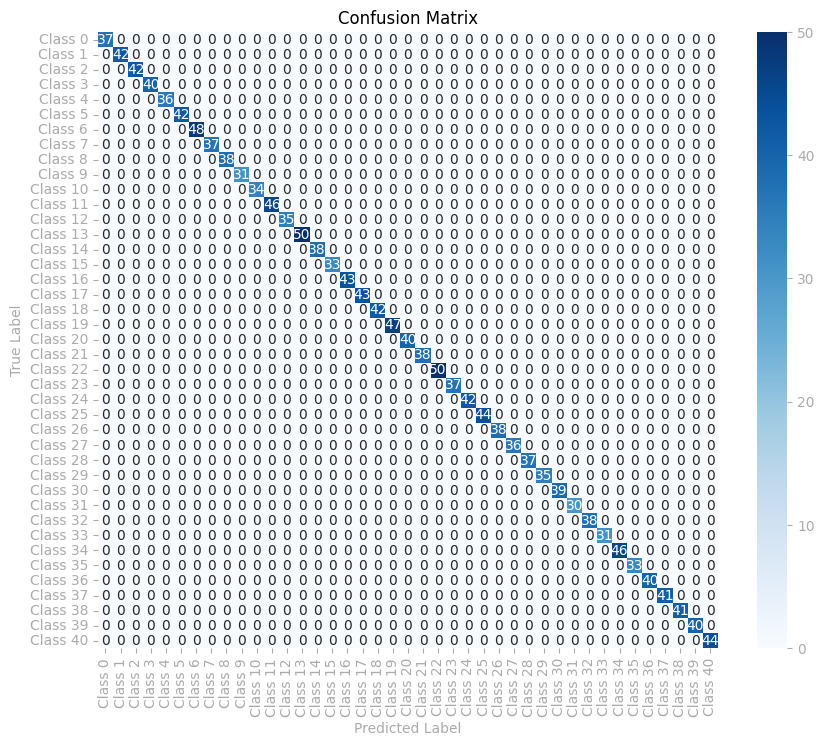

In [39]:
class_labels = [f'Class {i}' for i in range(41)]  # Replace with your own class labels

# Create a DataFrame from the confusion matrix
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
heatmap.set_xlabel('Predicted Label')
heatmap.set_ylabel('True Label')
heatmap.set_title('Confusion Matrix')

# Rotate tick labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [40]:
#train svc model
model=SVC()
model.fit(x_train,y_train)
print("for svm: ")
print(model.score(x_test,y_test))

for svm: 
1.0


In [41]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols

In [42]:
#function for reading the input
def readn(nstr):
    engine = pyttsx3.init()

    engine.setProperty('voice', "english+f5")
    engine.setProperty('rate', 130)

    engine.say(nstr)
    engine.runAndWait()
    engine.stop()

In [43]:
#initializing the dictionaries
severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()
symptoms_dict = {}
for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index

In [44]:
#function for calculating the conditions
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")

In [45]:
#funtion that reads symptoms from the dataset
def getDescription():
    global description_list
    with open('MasterData/symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)

In [46]:
#this function reads symptoms severity values from the dataset
def getSeverityDict():
    global severityDictionary
    with open('MasterData/symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass

In [47]:
#this function reads symptoms precaution values from the dataset
def getprecautionDict():
    global precautionDictionary
    with open('MasterData/symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)

In [48]:
#this function greets the user
def getInfo():
    print("-----------------------------------HealthCare ChatBot-----------------------------------")
    print("\nYour Name? \t\t\t\t",end="->")
    name=input("")
    print("Hello, ",name)

In [49]:
#function that checks for a pattern match between an input string and a list of disease names
def check_pattern(dis_list,inp):
    pred_list=[]
    inp=inp.replace(' ','_')
    patt = f"{inp}"
    regexp = re.compile(patt)
    pred_list=[item for item in dis_list if regexp.search(item)]
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return 0,[]

In [50]:
#function that performs a secondary prediction using a trained machine learning model
def sec_predict(symptoms_exp):
    df = pd.read_csv('Data/Training.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)

    symptoms_dict = {symptom: index for index, symptom in enumerate(X)}
    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
      input_vector[[symptoms_dict[item]]] = 1

    return rf_clf.predict([input_vector])

In [51]:
#function that takes a node as input and retrieves the corresponding disease labels based on the non-zero values in the node
def print_disease(node):
    node = node[0]
    val  = node.nonzero() 
    disease = le.inverse_transform(val[0])
    return list(map(lambda x:x.strip(),list(disease)))

In [52]:
#function that implements the decision tree logic for a healthcare chatbot
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    chk_dis=",".join(feature_names).split(",")
    symptoms_present = []

    while True:

        print("\nEnter the symptom you are experiencing  \t\t",end="->")
        disease_input = input("")
        conf,cnf_dis=check_pattern(chk_dis,disease_input)
        if conf==1:
            print("searches related to input: ")
            for num,it in enumerate(cnf_dis):
                print(num,")",it)
            if num!=0:
                print(f"Select the one you meant (0 - {num}):  ", end="")
                conf_inp = int(input(""))
            else:
                conf_inp=0

            disease_input=cnf_dis[conf_inp]
            break
            # print("Did you mean: ",cnf_dis,"?(yes/no) :",end="")
            # conf_inp = input("")
            # if(conf_inp=="yes"):
            #     break
        else:
            print("Enter valid symptom.")

    while True:
        try:
            num_days=int(input("Okay. From how many days ? : "))
            break
        except:
            print("Enter valid input.")
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            if name == disease_input:
                val = 1
            else:
                val = 0
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            present_disease = print_disease(tree_.value[node])
            # print( "You may have " +  present_disease )
            red_cols = reduced_data.columns 
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]
            # dis_list=list(symptoms_present)
            # if len(dis_list)!=0:
            #     print("symptoms present  " + str(list(symptoms_present)))
            # print("symptoms given "  +  str(list(symptoms_given)) )
            print("Are you experiencing any ")
            symptoms_exp=[]
            for syms in list(symptoms_given):
                inp=""
                print(syms,"? : ",end='')
                while True:
                    inp=input("")
                    if(inp=="yes" or inp=="no"):
                        break
                    else:
                        print("provide proper answers i.e. (yes/no) : ",end="")
                if(inp=="yes"):
                    symptoms_exp.append(syms)

            second_prediction=sec_predict(symptoms_exp)
            # print(second_prediction)
            calc_condition(symptoms_exp,num_days)
            if(present_disease[0]==second_prediction[0]):
                print("You may have ", present_disease[0])
                print(description_list[present_disease[0]])

                # readn(f"You may have {present_disease[0]}")
                # readn(f"{description_list[present_disease[0]]}")

            else:
                print("You may have ", present_disease[0], "or ", second_prediction[0])
                print(description_list[present_disease[0]])
                print(description_list[second_prediction[0]])

            

            
            
            
            # print(description_list[present_disease[0]])
            precution_list=precautionDictionary[present_disease[0]]
            print("Take following measures : ")
            for  i,j in enumerate(precution_list):
                print(i+1,")",j)

            # confidence_level = (1.0*len(symptoms_present))/len(symptoms_given)
            # print("confidence level is " + str(confidence_level))

    recurse(0, 1)

In [53]:
getSeverityDict()
getDescription()
getprecautionDict()
getInfo()
tree_to_code(clf,cols)
print("----------------------------------------------------------------------------------------")

-----------------------------------HealthCare ChatBot-----------------------------------

Your Name? 				->Bhavika Jain
Hello,  Bhavika Jain

Enter the symptom you are experiencing  		->pain
searches related to input: 
0 ) joint_pain
1 ) stomach_pain
2 ) pain_behind_the_eyes
3 ) back_pain
4 ) abdominal_pain
5 ) chest_pain
6 ) pain_during_bowel_movements
7 ) pain_in_anal_region
8 ) neck_pain
9 ) knee_pain
10 ) hip_joint_pain
11 ) muscle_pain
12 ) belly_pain
13 ) painful_walking
Select the one you meant (0 - 13):  3
Okay. From how many days ? : 3
Are you experiencing any 
back_pain ? : yes
weakness_in_limbs ? : no
neck_pain ? : no
dizziness ? : no
loss_of_balance ? : no
It might not be that bad but you should take precautions.
You may have  Cervical spondylosis or  Peptic ulcer diseae
Cervical spondylosis is a general term for age-related wear and tear affecting the spinal disks in your neck. As the disks dehydrate and shrink, signs of osteoarthritis develop, including bony projections a

C:\Users\jhala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
